In [1]:
%pip install xgboost

import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt


### Am luat top 40 caracteristici sa folosim, mai bune rezultatele decat top 20


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\lazar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [ ]:

data = pd.read_csv("all_data.csv")


main_labels = [
    "Flow Duration", "Total Fwd Packets", "Total Backward Packets", "Total Length of Fwd Packets",
    "Total Length of Bwd Packets", "Fwd Packet Length Max", "Fwd Packet Length Min",
    "Fwd Packet Length Mean", "Fwd Packet Length Std", "Bwd Packet Length Max", "Bwd Packet Length Min",
    "Bwd Packet Length Mean", "Bwd Packet Length Std", "Flow Bytes/s", "Flow Packets/s",
    "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max", "Flow IAT Min", "Fwd IAT Total", "Fwd IAT Mean",
    "Fwd IAT Std", "Fwd IAT Max", "Fwd IAT Min", "Bwd IAT Total", "Bwd IAT Mean", "Bwd IAT Std",
    "Bwd IAT Max", "Bwd IAT Min", "Fwd PSH Flags", "Bwd PSH Flags", "Fwd URG Flags", "Bwd URG Flags",
    "Fwd Header Length", "Bwd Header Length", "Fwd Packets/s", "Bwd Packets/s", "Min Packet Length",
    "Max Packet Length", "Packet Length Mean", "Packet Length Std", "Packet Length Variance",
    "FIN Flag Count", "SYN Flag Count", "RST Flag Count", "PSH Flag Count", "ACK Flag Count",
    "URG Flag Count", "CWE Flag Count", "ECE Flag Count", "Down/Up Ratio", "Average Packet Size",
    "Avg Fwd Segment Size", "Avg Bwd Segment Size", "Fwd Avg Bytes/Bulk", "Fwd Avg Packets/Bulk",
    "Fwd Avg Bulk Rate", "Bwd Avg Bytes/Bulk", "Bwd Avg Packets/Bulk", "Bwd Avg Bulk Rate",
    "Subflow Fwd Packets", "Subflow Fwd Bytes", "Subflow Bwd Packets", "Subflow Bwd Bytes",
    "Init_Win_bytes_forward", "Init_Win_bytes_backward", "act_data_pkt_fwd",
    "min_seg_size_forward", "Active Mean", "Active Std", "Active Max", "Active Min",
    "Idle Mean", "Idle Std", "Idle Max", "Idle Min", "Label"
]


data = data[main_labels]


X = data.drop(columns=["Label"])
y = data["Label"]

# Convertim etichetele in valori numerice
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42)

print("Dimensiunea setului de antrenament:", X_train.shape)
print("Dimensiunea setului de test:", X_test.shape)
print("\nClasele după conversie:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


C:\Users\lazar\AppData\Local\Temp\ipykernel_17824\1633098884.py:2: DtypeWarning: Columns (84) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("all_data.csv")


Dimensiunea setului de antrenament: (2264594, 76)
Dimensiunea setului de test: (566149, 76)

Clasele după conversie: {'BENIGN': np.int64(0), 'Bot': np.int64(1), 'DDoS': np.int64(2), 'DoS GoldenEye': np.int64(3), 'DoS Hulk': np.int64(4), 'DoS Slowhttptest': np.int64(5), 'DoS slowloris': np.int64(6), 'FTP-Patator': np.int64(7), 'Heartbleed': np.int64(8), 'Infiltration': np.int64(9), 'PortScan': np.int64(10), 'SSH-Patator': np.int64(11), 'Web Attack - Brute Force': np.int64(12), 'Web Attack - Sql Injection': np.int64(13), 'Web Attack - XSS': np.int64(14)}


In [ ]:

xgb_model = xgb.XGBClassifier(n_estimators=200, random_state=42, use_label_encoder=False, eval_metric="mlogloss", n_jobs=-1)


xgb_model.fit(X_train, y_train)

print("Model XGBoost antrenat cu succes!")


C:\Users\lazar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [14:08:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model XGBoost antrenat cu succes!


Top 40 caracteristici importante in XGBoost:

                    Feature  Importance
             PSH Flag Count 4437.631836
                  Idle Mean 2397.977295
Total Length of Fwd Packets 2235.476074
      Bwd Packet Length Std 1653.157471
      Fwd Packet Length Min 1554.052490
          Total Fwd Packets 1214.971680
              Fwd URG Flags  727.937500
           act_data_pkt_fwd  691.224365
      Fwd Packet Length Std  512.445618
               Flow Bytes/s  457.881165
              Bwd Packets/s  453.752716
Total Length of Bwd Packets  394.223145
     Bwd Packet Length Mean  387.423035
        Average Packet Size  376.043457
             FIN Flag Count  368.625244
                 Active Std  335.875214
     Total Backward Packets  310.694122
              Fwd PSH Flags  192.180023
         Packet Length Mean  178.491730
      Fwd Packet Length Max  160.061615
          Max Packet Length  132.218201
     Init_Win_bytes_forward  118.170189
          Fwd Header Length  116.1

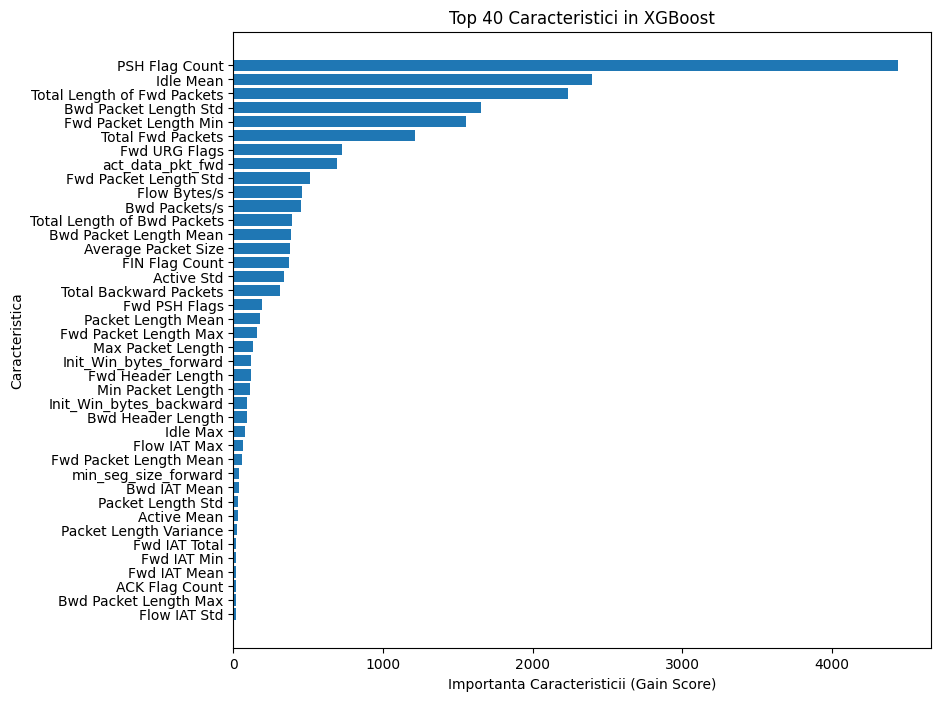

In [ ]:
# importanta carac cu metoda gain
importance = xgb_model.get_booster().get_score(importance_type="gain")


importance_df = pd.DataFrame({"Feature": list(importance.keys()), "Importance": list(importance.values())})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

print("Top 40 caracteristici importante in XGBoost:\n")
print(importance_df.head(40).to_string(index=False))

top_n = 40
top_features = importance_df["Feature"][:top_n].tolist()

print("Top 40 caracteristici importante in XGBoost:\n")
print(importance_df.head(40).to_string(index=False))

plt.figure(figsize=(9, 8))
plt.barh(importance_df["Feature"][:40], importance_df["Importance"][:40])
plt.xlabel("Importanta Caracteristicii (Gain Score)")
plt.ylabel("Caracteristica")
plt.title("Top 40 Caracteristici in XGBoost")
plt.gca().invert_yaxis()
plt.show()



C:\Users\lazar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [14:23:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\lazar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [14:30:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\lazar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarnin

,Top Caracteristici,Acuratete,Precizie,Recall,F1-Score
0,10,0.962314,0.983351,0.635844,0.711627
1,20,0.964907,0.983855,0.679869,0.742473
2,30,0.987385,0.913538,0.775432,0.798035
3,40,0.988475,0.913516,0.839695,0.855017


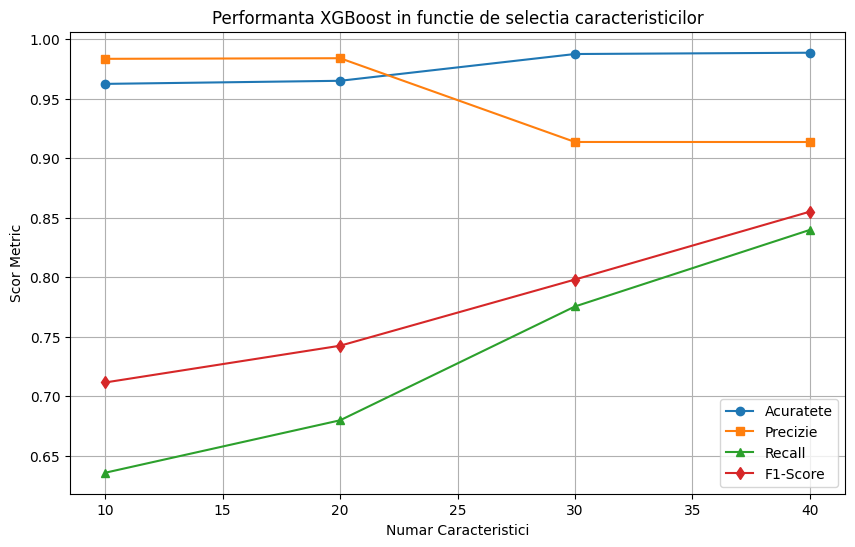

In [ ]:


results = []

for n in [10, 20, 30, 40]:
    top_feats = importance_df.head(n)["Feature"].tolist()
    
    X_train_n = X_train[top_feats]
    X_test_n = X_test[top_feats]
    
    # Antrenam modelul XGBoost cu subseturile de caracteristici
    xgb_model_n = xgb.XGBClassifier(n_estimators=200,
                                    random_state=42,
                                    use_label_encoder=False,
                                    eval_metric="mlogloss",
                                    n_jobs=-1)
    xgb_model_n.fit(X_train_n, y_train)
    y_pred_n = xgb_model_n.predict(X_test_n)
    

    accuracy = accuracy_score(y_test, y_pred_n)
    precision = precision_score(y_test, y_pred_n, average='macro') 
    recall = recall_score(y_test, y_pred_n, average='macro')
    f1 = f1_score(y_test, y_pred_n, average='macro')
    
    results.append((n, accuracy, precision, recall, f1))


results_df = pd.DataFrame(results, columns=['Top Caracteristici', 'Acuratete', 'Precizie', 'Recall', 'F1-Score'])


display(results_df)


plt.figure(figsize=(10,6))
plt.plot(results_df['Top Caracteristici'], results_df['Acuratete'], marker='o', label="Acuratete")
plt.plot(results_df['Top Caracteristici'], results_df['Precizie'], marker='s', label="Precizie")
plt.plot(results_df['Top Caracteristici'], results_df['Recall'], marker='^', label="Recall")
plt.plot(results_df['Top Caracteristici'], results_df['F1-Score'], marker='d', label="F1-Score")

plt.xlabel("Numar Caracteristici")
plt.ylabel("Scor Metric")
plt.title("Performanta XGBoost in functie de selectia caracteristicilor")
plt.legend()
plt.grid(True)
plt.show()
